<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# Проект «Анализ вакансий из HeadHunter»
   

In [1]:
import pandas as pd
import psycopg2

In [5]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [6]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

In [8]:
# Вывела названия всех таблиц для удобства работы
query_tables = '''
SELECT table_name FROM information_schema.tables 
WHERE table_schema = 'public';
'''
df_tables = pd.read_sql(query_tables, connection)
print(df_tables)

               table_name
0                    test
1   stored_procedure_prac
2                 columns
3               contracts
4                  t_tab1
5                  t_tab2
6              operations
7                 table_1
8            films_recent
9                  cities
10                doctors
11              employers
12   employers_industries
13             industries
14              vacancies
15                  areas
16           ds_vacancies


C:\Users\User\AppData\Local\Temp\ipykernel_15284\3101962382.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_tables = pd.read_sql(query_tables, connection)


## 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в базе (вакансии находятся в таблице `vacancies`).

In [9]:
# текст запроса
query_3_1 = f'''
SELECT COUNT(*) AS vacancy_count FROM vacancies;
'''

In [10]:
# результат запроса
df = pd.read_sql(query_3_1, connection)

# Выводим результат
print(df)

   vacancy_count
0          49197


C:\Users\User\AppData\Local\Temp\ipykernel_15284\3958216174.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_3_1, connection)


2. Напишите запрос, который посчитает количество работодателей (таблица `employers`).

In [13]:
# текст запроса
query_3_2 = f'''
SELECT COUNT(*) AS employer_count FROM employers;
'''

In [14]:
# результат запроса
df = pd.read_sql(query_3_2, connection)

# Выводим результат
print(df)

   employer_count
0           23501


C:\Users\User\AppData\Local\Temp\ipykernel_15284\3038429694.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_3_2, connection)


3. Посчитайте с помощью запроса количество регионов (таблица `areas`).

In [15]:
# текст запроса
query_3_3 = f'''
SELECT COUNT(*) AS area_count FROM areas;
'''

In [16]:
# результат запроса
df = pd.read_sql(query_3_3, connection)

# Выводим результат
print(df)

   area_count
0        1362


C:\Users\User\AppData\Local\Temp\ipykernel_15284\3245598461.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_3_3, connection)


4. Посчитайте с помощью запроса количество сфер деятельности в базе (таблица `industries`).

In [17]:
# текст запроса
query_3_4 = f'''
SELECT COUNT(*) AS industry_count FROM industries;
'''

In [18]:
# результат запроса
df = pd.read_sql(query_3_4, connection)

# Выводим результат
print(df)

   industry_count
0             294


C:\Users\User\AppData\Local\Temp\ipykernel_15284\1207865837.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_3_4, connection)


***

1. Среднее количество вакансий на одного работодателя 49197/23501 примерно = 2.09.
Каждый работодатель в среднем размещает 2 вакансии. Это говорит о том, что большинство компаний нанимают точечно, а не массово. Возможно, среди них много небольших или средних компаний, а не корпораций с активным набором сотрудников.

2. Среднее количество вакансий на регион 49197/1362 примерно = 36.1.
В среднем на один регион приходится 36 вакансий. Однако, скорее всего, вакансии распределены неравномерно: в крупных городах (Москва, Санкт-Петербург) предложений больше, а в отдалённых регионах меньше.

3. Среднее количество вакансий на сферу деятельности 49197/294 примерно = 167.3.
В среднем 167 вакансий на одну сферу. Это говорит о том, что рынок труда достаточно разнообразен, но также стоит проверить, есть ли доминирующие отрасли (например, IT, продажи, производство).

4. Среднее количество работодателей на регион 23501/1362 примерно = 17.3.
В среднем 17 работодателей на регион. Опять же, это среднее значение, и, вероятно, в крупных городах число работодателей гораздо выше, чем в небольших населённых пунктах.

Предварительные выводы:
1. Рынок труда активный — почти 50 000 вакансий.
2. Работодателей тоже много, что говорит о конкуренции среди компаний.
3. Региональное распределение вакансий может быть неравномерным.
4. Много сфер деятельности, но стоит проверить, какие из них лидируют.

## 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (`cnt`) вакансий в каждом регионе (`area`).
Отсортируйте по количеству вакансий в порядке убывания.

In [25]:
# текст запроса
query_4_1 = f'''
    SELECT a.name AS region, COUNT(v.id) AS cnt
FROM vacancies v
JOIN areas a ON v.area_id = a.id
GROUP BY a.name
ORDER BY cnt DESC;
'''

In [26]:
# результат запроса
df = pd.read_sql(query_4_1, connection)

# Выводим результат
print(df)

C:\Users\User\AppData\Local\Temp\ipykernel_15284\373523309.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_4_1, connection)


              region   cnt
0             Москва  5333
1    Санкт-Петербург  2851
2              Минск  2112
3        Новосибирск  2006
4             Алматы  1892
..               ...   ...
764       Тарко-Сале     1
765    Новоаннинский     1
766            Бирск     1
767           Сасово     1
768             Анна     1

[769 rows x 2 columns]


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [27]:
# текст запроса
query_4_2 = f'''
SELECT COUNT(*) AS vacancy_count
FROM vacancies
WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL;
'''

In [28]:
# результат запроса
df = pd.read_sql(query_4_2, connection)

# Выводим результат
print(df)

   vacancy_count
0          24073


C:\Users\User\AppData\Local\Temp\ipykernel_15284\3183580450.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_4_2, connection)


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до **целого числа**.

In [29]:
# текст запроса
query_4_3 = f'''
SELECT 
    ROUND(AVG(salary_from)) AS avg_salary_from, 
    ROUND(AVG(salary_to)) AS avg_salary_to
FROM vacancies;
'''

In [30]:
# результат запроса
df = pd.read_sql(query_4_3, connection)

# Выводим результат
print(df)

C:\Users\User\AppData\Local\Temp\ipykernel_15284\1125768720.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_4_3, connection)


   avg_salary_from  avg_salary_to
0          71065.0       110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (`schedule`) и типа трудоустройства (`employment`), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [33]:
# текст запроса
query_4_4 = f'''
SELECT schedule, employment, COUNT(*) AS vacancy_count
FROM vacancies
GROUP BY schedule, employment
ORDER BY vacancy_count DESC;
'''

In [34]:
# результат запроса
df = pd.read_sql(query_4_4, connection)

# Выводим результат
print(df)

            schedule           employment  vacancy_count
0        Полный день     Полная занятость          35367
1   Удаленная работа     Полная занятость           7802
2      Гибкий график     Полная занятость           1593
3   Удаленная работа  Частичная занятость           1312
4     Сменный график     Полная занятость            940
5        Полный день           Стажировка            569
6     Вахтовый метод     Полная занятость            367
7        Полный день  Частичная занятость            347
8      Гибкий график  Частичная занятость            312
9        Полный день     Проектная работа            141
10  Удаленная работа     Проектная работа            133
11     Гибкий график           Стажировка            116
12    Сменный график  Частичная занятость            101
13  Удаленная работа           Стажировка             64
14     Гибкий график     Проектная работа             18
15    Сменный график           Стажировка             12
16    Вахтовый метод     Проект

C:\Users\User\AppData\Local\Temp\ipykernel_15284\4109000626.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_4_4, connection)


5. Напишите запрос, выводящий значения поля «Требуемый опыт работы» (`experience`) в порядке возрастания количества вакансий, в которых указан данный вариант опыта.

In [35]:
# текст запроса
query_4_5 = f'''
SELECT experience, COUNT(*) AS vacancy_count
FROM vacancies
GROUP BY experience
ORDER BY vacancy_count ASC;
'''

In [36]:
# результат запроса
df = pd.read_sql(query_4_5, connection)

# Выводим результат
print(df)

           experience  vacancy_count
0         Более 6 лет           1337
1           Нет опыта           7197
2       От 3 до 6 лет          14511
3  От 1 года до 3 лет          26152


C:\Users\User\AppData\Local\Temp\ipykernel_15284\4272518076.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_4_5, connection)


# выводы по детальному анализу вакансий
1. География вакансий
Больше всего вакансий в Москве (5333), Санкт-Петербурге (2851), Минске (2112), Новосибирске (2006) и Алматы (1892).
Вакансии сосредоточены в крупных экономических центрах.

2. Рабочий график и занятость
Полный день + Полная занятость — 35367 вакансий (основной формат работы).
Удаленная работа + Полная занятость — 7802 вакансии (удаленка набирает популярность).
Гибкий график + Полная занятость — 1593 вакансии.
Удаленная работа + Частичная занятость — 1312 вакансий.

3. Зарплатные данные
В 24073 вакансиях (49%) указана хотя бы одна граница зарплаты.
Средняя зарплатная вилка: от 71 065 до 110 537 руб.
Разброс в зарплатах значительный, что зависит от квалификации и должности.


5. Требуемый опыт работы
Чаще всего ищут специалистов с опытом:
1–3 года — 26 152 вакансии.
3–6 лет — 14 511 вакансий.
Без опыта — 7 197 вакансий (есть возможность для начинающих).
Более 6 лет — 1 337 вакансий (руководящие и экспертные позиции).


Вакансии сосредоточены в мегаполисах, преобладает полная занятость. Удаленная работа занимает второе место, но встречается реже. Половина вакансий содержит зарплатные данные, а диапазон доходов сильно варьируется. Чаще всего требуются специалисты с 1–3 годами опыта, но есть предложения и для новичков.

## 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [39]:
# текст запроса
query_5_1 = f'''(
    SELECT e.name AS employer, COUNT(*) AS vacancy_count
    FROM vacancies v
    JOIN employers e ON v.employer_id = e.id
    GROUP BY e.name
    ORDER BY vacancy_count DESC
    LIMIT 1
)
UNION ALL
(
    SELECT e.name AS employer, COUNT(*) AS vacancy_count
    FROM vacancies v
    JOIN employers e ON v.employer_id = e.id
    GROUP BY e.name
    ORDER BY vacancy_count DESC
    LIMIT 1 OFFSET 4
);
'''

In [40]:
# результат запроса
df = pd.read_sql(query_5_1, connection)

# Выводим результат
print(df)

C:\Users\User\AppData\Local\Temp\ipykernel_15284\49894091.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_5_1, connection)


        employer  vacancy_count
0         Яндекс           1933
1  Газпром нефть            331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [53]:
# текст запроса
query_5_2_1 = f'''
SELECT 
    a.name AS region, 
    COUNT(DISTINCT v.employer_id) AS employer_count, 
    COUNT(v.id) AS vacancy_count
FROM areas a
LEFT JOIN vacancies v ON a.id = v.area_id
GROUP BY a.name
ORDER BY vacancy_count DESC;
'''

In [54]:
query_5_2_2 = f'''
SELECT 
    a.name AS region, 
    COUNT(DISTINCT v.employer_id) AS employer_count
FROM areas a
LEFT JOIN vacancies v ON a.id = v.area_id
GROUP BY a.name
HAVING COUNT(v.id) = 0
ORDER BY employer_count DESC
LIMIT 1;
'''

In [57]:
# результат запроса 
df = pd.read_sql(query_5_2_1, connection)

# Выводим результат количества работодателей и вакансий в нём
print(df)

C:\Users\User\AppData\Local\Temp\ipykernel_15284\3796143725.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_5_2_1, connection)


                     region  employer_count  vacancy_count
0                    Москва            2320           5333
1           Санкт-Петербург            1451           2851
2                     Минск             851           2112
3               Новосибирск             802           2006
4                    Алматы             798           1892
...                     ...             ...            ...
1357             Нефтекумск               0              0
1358          Краснозёрское               0              0
1359                    Нея               0              0
1360          Краснозерское               0              0
1361  Нижегородская область               0              0

[1362 rows x 3 columns]


In [58]:
# результат запроса 
df = pd.read_sql(query_5_2_2, connection)

# Выводим результат - регион без вакансий, но с наибольшим количеством работодателей 
print(df)

     region  employer_count
0  Абатское               0


C:\Users\User\AppData\Local\Temp\ipykernel_15284\2523512093.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_5_2_2, connection)


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [61]:
# текст запроса
query_5_3 = f'''
SELECT 
    e.name AS employer_name, 
    COUNT(DISTINCT v.area_id) AS region_count
FROM vacancies v
JOIN employers e ON v.employer_id = e.id
GROUP BY e.name
ORDER BY region_count DESC;
'''

In [62]:
# результат запроса
df = pd.read_sql(query_5_3, connection)

# Выводим результат 
print(df)

C:\Users\User\AppData\Local\Temp\ipykernel_15284\506243922.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_5_3, connection)


                employer_name  region_count
0                      Яндекс           181
1                  Ростелеком           152
2                  Спецремонт           116
3      Поляков Денис Иванович            88
4                   ООО ЕФИН             71
...                       ...           ...
14761                  UniSol             1
14762            UNISTORY LLC             1
14763                   UNIT6             1
14764     United Distribution             1
14765              UNITEL LLC             1

[14766 rows x 2 columns]


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности.

In [83]:
# текст запроса
query_5_4 = f'''
SELECT COUNT(e.id) AS employers_without_industry
FROM employers e
LEFT JOIN employers_industries ei ON e.id = ei.employer_id
WHERE ei.industry_id IS NULL;
'''

In [84]:
# результат запроса
df = pd.read_sql(query_5_4, connection)

# Выводим результат 
print(df)

   employers_without_industry
0                        8419


C:\Users\User\AppData\Local\Temp\ipykernel_15284\2325643303.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_5_4, connection)


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности.

In [85]:
# текст запроса
query_5_5 = f'''
SELECT e.name 
FROM employers e
JOIN employers_industries ei ON e.id = ei.employer_id
GROUP BY e.id, e.name
HAVING COUNT(ei.industry_id) = 4
ORDER BY e.name
LIMIT 1 OFFSET 2;
'''

In [86]:
# результат запроса
df = pd.read_sql(query_5_5, connection)

# Выводим результат 
print(df)

   name
0  2ГИС


C:\Users\User\AppData\Local\Temp\ipykernel_15284\3460916181.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_5_5, connection)


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана «Разработка программного обеспечения».


In [89]:
# текст запроса
query_5_6 = f'''
SELECT COUNT(DISTINCT ei.employer_id) AS employer_count
FROM employers_industries ei
JOIN industries i ON ei.industry_id = i.id
WHERE i.name = 'Разработка программного обеспечения';
'''

In [90]:
# результат запроса
df = pd.read_sql(query_5_6, connection)

# Выводим результат 
print(df)

   employer_count
0            3553


C:\Users\User\AppData\Local\Temp\ipykernel_15284\866718697.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_5_6, connection)


7. Для компании «Яндекс» выведите список [городов-миллионников](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8), в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку "Total" с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

    Если возникнут трудности с этим заданием, посмотрите материалы модуля 6.4 «Как получать данные из веб-источников и API».

In [101]:
# код для получения списка городов-милионников
import requests

# URL Overpass API
url = "http://overpass-api.de/api/interpreter"

# Overpass Query
query = """
[out:json];
area["ISO3166-1"="RU"]->.russia;
node
  [place=city]
  ["population"]
  (area.russia);
out body;
"""

# Выполняем запрос
response = requests.get(url, params={"data": query})
data = response.json()

# Фильтруем только города с населением больше 1 000 000
cities = []
for element in data["elements"]:
    name = element["tags"].get("name")
    population = int(element["tags"].get("population", 0))
    if population >= 1_000_000:
        cities.append((name, population))

# Сортируем по населению
cities.sort(key=lambda x: x[1], reverse=True)

# Выводим список
for city, pop in cities:
    print(f"{city}: {pop}")

# Формируем список только с названиями городов
city_names = [city[0] for city in cities]

# Преобразуем в строку для SQL-запроса
city_names_sql = ", ".join(f"'{city}'" for city in city_names)
print(city_names_sql)  # Проверим, как выглядит строка


Москва: 13149803
Санкт-Петербург: 5597763
Новосибирск: 1633851
Екатеринбург: 1536183
Казань: 1318604
Красноярск: 1205473
Нижний Новгород: 1204985
Челябинск: 1177058
Самара: 1163645
Уфа: 1163304
Краснодар: 1138654
Ростов-на-Дону: 1135968
Омск: 1104485
Воронеж: 1051995
Пермь: 1026908
Волгоград: 1025662
'Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Красноярск', 'Нижний Новгород', 'Челябинск', 'Самара', 'Уфа', 'Краснодар', 'Ростов-на-Дону', 'Омск', 'Воронеж', 'Пермь', 'Волгоград'


In [102]:
# текст запроса
query_5_7 = f"""
WITH city_vacancies AS (
    SELECT area.name AS city, COUNT(*) AS vacancy_count
    FROM vacancies v
    JOIN areas area ON v.area_id = area.id
    JOIN employers e ON v.employer_id = e.id
    WHERE e.name = 'Яндекс' AND area.name IN ({city_names_sql})
    GROUP BY area.name
)
SELECT city, vacancy_count FROM city_vacancies
UNION ALL
SELECT 'Total', SUM(vacancy_count) FROM city_vacancies
ORDER BY vacancy_count ASC;
"""


In [103]:
# результат запроса
df = pd.read_sql(query_5_7, connection)

# Выводим результат 
print(df)

               city  vacancy_count
0              Омск           21.0
1         Челябинск           22.0
2        Красноярск           23.0
3         Волгоград           24.0
4             Пермь           25.0
5            Казань           25.0
6    Ростов-на-Дону           25.0
7            Самара           26.0
8               Уфа           26.0
9         Краснодар           30.0
10          Воронеж           32.0
11      Новосибирск           35.0
12  Нижний Новгород           36.0
13     Екатеринбург           39.0
14  Санкт-Петербург           42.0
15           Москва           54.0
16            Total          485.0


C:\Users\User\AppData\Local\Temp\ipykernel_15284\439775172.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_5_7, connection)


***

# выводы по анализу работодателей
Анализ вакансий показывает, что крупнейшим работодателем по количеству опубликованных вакансий является «Яндекс» (1933 вакансии), за ним следует «Газпром нефть» (331 вакансия). Москва и Санкт-Петербург лидируют по числу работодателей и вакансий, при этом в Москве размещено более 5 тысяч вакансий. Значительная часть работодателей (8419) не указывает сферу деятельности, что может усложнять поиск работы по отраслям. Среди компаний с четырьмя сферами деятельности третьей в алфавитном порядке оказалась «2ГИС». В сфере «Разработка программного обеспечения» работают 3553 работодателя. Вакансии «Яндекса» представлены в городах-миллионниках, но их распределение неравномерное: например, в Омске — 21 вакансия, а всего — 485 вакансий.

## 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

    Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова `'data'` или `'данн'`.

    *Обратите внимание, что названия вакансий могут быть написаны в любом регистре.*


In [105]:
# текст запроса
query_6_1 = f'''
SELECT COUNT(*) AS data_related_vacancies
FROM vacancies
WHERE LOWER(name) LIKE '%data%' OR LOWER(name) LIKE '%данн%';
'''

In [106]:
# результат запроса
df = pd.read_sql(query_6_1, connection)

# Выводим результат 
print(df)

C:\Users\User\AppData\Local\Temp\ipykernel_15284\2192371003.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_6_1, connection)


   data_related_vacancies
0                    1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
    * 'data scientist'
    * 'data science'
    * 'исследователь данных'
    * 'ML' (здесь не нужно брать вакансии по HTML)
    * 'machine learning'
    * 'машинн%обучен%'

    **В следующих заданиях мы продолжим работать с вакансиями по этому условию.**

    Считаем вакансиями для специалистов уровня Junior следующие:
    + в названии есть слово “junior” **или**
    + требуемый опыт — «Нет опыта» **или**
    + тип трудоустройства — «Стажировка».


In [108]:
# текст запроса
query_6_2 = f'''
SELECT COUNT(*) AS junior_ds_vacancies
FROM vacancies
WHERE (
    LOWER(name) LIKE '%data scientist%' OR 
    LOWER(name) LIKE '%data science%' OR 
    LOWER(name) LIKE '%исследователь данных%' OR 
    (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%') OR
    LOWER(name) LIKE '%machine learning%' OR 
    LOWER(name) LIKE '%машинн%обучен%'
) 
AND (
    LOWER(name) LIKE '%junior%' OR 
    experience = 'Нет опыта' OR 
    employment = 'Стажировка'
);
'''

In [109]:
# результат запроса
df = pd.read_sql(query_6_2, connection)

# Выводим результат 
print(df)

C:\Users\User\AppData\Local\Temp\ipykernel_15284\3662680524.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_6_2, connection)


   junior_ds_vacancies
0                   51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или Postgres?

    *Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [110]:
# текст запроса
query_6_3 = f'''
SELECT COUNT(*) AS ds_vacancies_with_sql
FROM vacancies
WHERE (
    LOWER(name) LIKE '%data scientist%' OR 
    LOWER(name) LIKE '%data science%' OR 
    LOWER(name) LIKE '%исследователь данных%' OR 
    (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%') OR
    LOWER(name) LIKE '%machine learning%' OR 
    LOWER(name) LIKE '%машинн%обучен%'
) 
AND (
    LOWER(key_skills) LIKE '%sql%' OR 
    LOWER(key_skills) LIKE '%postgres%'
);
'''

In [111]:
# результат запроса
df = pd.read_sql(query_6_3, connection)

# Выводим результат 
print(df)

C:\Users\User\AppData\Local\Temp\ipykernel_15284\1787216350.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_6_3, connection)


   ds_vacancies_with_sql
0                    229


4. Проверьте, насколько популярен Python в требованиях работодателей к DS. Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

    *Это можно сделать помощью запроса, аналогичного предыдущему.*

In [112]:
# текст запроса
query_6_4 = f'''
SELECT COUNT(*) AS ds_vacancies_with_python
FROM vacancies
WHERE (
    LOWER(name) LIKE '%data scientist%' OR 
    LOWER(name) LIKE '%data science%' OR 
    LOWER(name) LIKE '%исследователь данных%' OR 
    (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%') OR
    LOWER(name) LIKE '%machine learning%' OR 
    LOWER(name) LIKE '%машинн%обучен%'
) 
AND LOWER(key_skills) LIKE '%python%';
'''

In [113]:
# результат запроса
df = pd.read_sql(query_6_4, connection)

# Выводим результат 
print(df)

C:\Users\User\AppData\Local\Temp\ipykernel_15284\4106316143.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_6_4, connection)


   ds_vacancies_with_python
0                       357


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до **двух знаков после точки-разделителя**.

In [127]:
# текст запроса
query_6_5 = f'''
SELECT
    ROUND(AVG(LENGTH(key_skills) - LENGTH(REPLACE(key_skills, CHR(9), '')) + 1), 2) AS avg_key_skills,
    COUNT(*) AS total_vacancies
FROM public.vacancies
WHERE (LOWER(name) LIKE '%data scientist%'
   OR LOWER(name) LIKE '%data science%'
   OR LOWER(name) LIKE '%исследователь данных%'
   OR (LOWER(name) LIKE '% ml %' AND LOWER(name) NOT LIKE '%html%')
   OR LOWER(name) LIKE '%machine learning%'
   OR LOWER(name) LIKE '%машинн%обучен%')
   AND key_skills IS NOT NULL
   AND key_skills != '';
'''

In [128]:
# результат запроса
df = pd.read_sql(query_6_5, connection)

# Выводим результат 
print(df)

C:\Users\User\AppData\Local\Temp\ipykernel_15284\3835504553.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_6_5, connection)


   avg_key_skills  total_vacancies
0            6.41              352


In [ ]:
6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в среднем указывают для каждого типа требуемого опыта (уникальное значение из поля `experience`).

    При решении задачи примите во внимание следующее:
    1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
    2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
    3. Если в расчётах участвует `null`, в результате он тоже даст `null` (посмотрите, что возвращает запрос `select 1 + null`). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит `null` на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

    Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до **целого числа**.

In [132]:
# текст запроса
query_6_6 = f'''
SELECT 
    experience,
    ROUND(AVG(
        CASE 
            WHEN salary_from IS NOT NULL AND salary_to IS NOT NULL 
                THEN (salary_from + salary_to) / 2
            ELSE COALESCE(salary_from, salary_to)
        END
    )) AS avg_salary
FROM vacancies
WHERE (
    LOWER(name) LIKE '%data scientist%' OR 
    LOWER(name) LIKE '%data science%' OR 
    LOWER(name) LIKE '%исследователь данных%' OR 
    (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%') OR
    LOWER(name) LIKE '%machine learning%' OR 
    LOWER(name) LIKE '%машинн%обучен%'
) 
AND (salary_from IS NOT NULL OR salary_to IS NOT NULL)
GROUP BY experience
ORDER BY avg_salary DESC;

'''

In [133]:
# результат запроса
df = pd.read_sql(query_6_6, connection)

# Выводим результат 
print(df)

C:\Users\User\AppData\Local\Temp\ipykernel_15284\3936791844.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query_6_6, connection)


           experience  avg_salary
0       От 3 до 6 лет    256454.0
1         Более 6 лет    157933.0
2  От 1 года до 3 лет    144233.0
3           Нет опыта     74643.0


***

# выводы по предметному анализу
Анализ вакансий, связанных с Data Science, показал следующие результаты:

Всего 1771 вакансия имеет отношение к данным, что говорит о значительном спросе на специалистов в этой области.
Для начинающих дата-сайентистов (Junior, стажировка, без опыта) доступно 51 вакансия, что свидетельствует о высокой конкуренции на старте карьеры.
SQL или Postgres как ключевые навыки требуются в 229 вакансиях для DS, подчёркивая важность работы с базами данных.
Python остаётся самым популярным языком программирования среди требований работодателей: его указывают в 357 вакансиях.
В среднем в вакансиях для DS указывают 6.41 ключевых навыка, что говорит о многопрофильности профессии.
Средняя зарплата для специалистов в Data Science составляет 256454, что подтверждает высокую востребованность и уровень оплаты труда в этой сфере.
Таким образом, рынок вакансий в Data Science активно развивается, но начинающим специалистам может быть сложнее найти работу из-за высокой конкуренции и требований к навыкам.

## Общий вывод по проекту

# подведем итог исследования, обобщите выводы
Анализ вакансий в сфере данных и IT показал несколько ключевых тенденций:

1. Высокий спрос на специалистов по данным

2. Всего 1771 вакансия относится к данным, из них 3553 работодателя указывают сферу «Разработка ПО».
Data Science остаётся перспективным направлением, но для новичков (Junior, стажировки, без опыта) доступно всего 51 вакансия, что говорит о высокой конкуренции.
Ключевые навыки и технологии

3. SQL/Postgres востребованы в 229 вакансиях DS, а Python в 357, подтверждая их важность для аналитиков и разработчиков.
В среднем в вакансиях указывают 6.41 ключевых навыка, что показывает многопрофильность профессии.
Зарплатные ожидания

4. Средняя зарплата в Data Science составляет 256 454 руб., а специалисты с опытом от 3 до 6 лет могут рассчитывать на ещё более высокие предложения.
Крупнейшие работодатели и регионы

5. Лидерами по количеству вакансий являются Яндекс (1933 вакансии) и Газпром нефть (331 вакансия).
Больше всего предложений в Москве (5333 вакансии, 2320 работодателей) и Санкт-Петербурге (2851 вакансия, 1451 работодатель).

C:\Users\User\AppData\Local\Temp\ipykernel_15284\1009088717.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(cities.values()), y=list(cities.keys()), palette="Blues_r")


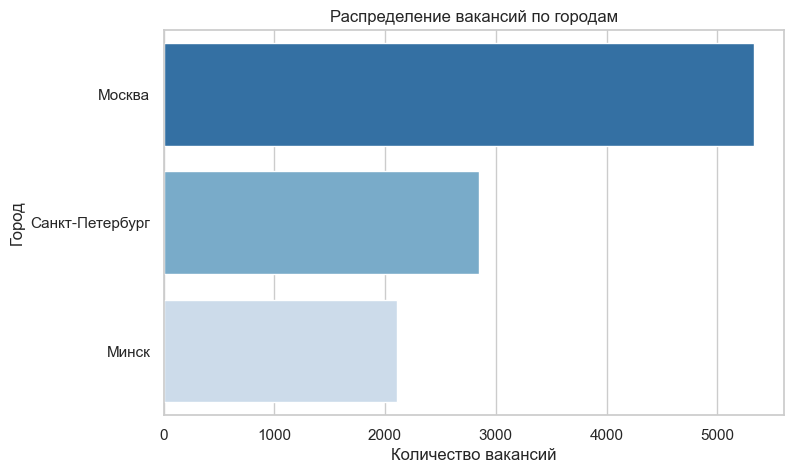

C:\Users\User\AppData\Local\Temp\ipykernel_15284\1009088717.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(skills.keys()), y=list(skills.values()), palette="Oranges_r")


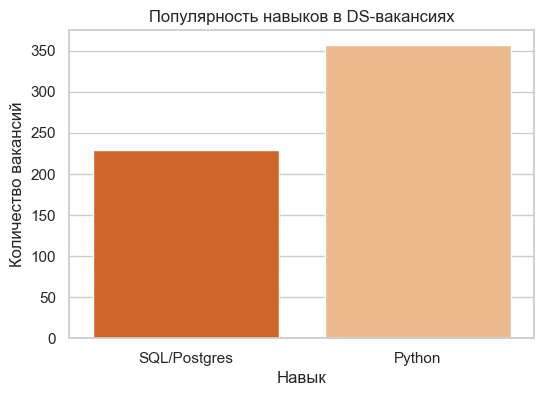

C:\Users\User\AppData\Local\Temp\ipykernel_15284\1009088717.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(experience_salary.keys()), y=list(experience_salary.values()), palette="Greens_r")


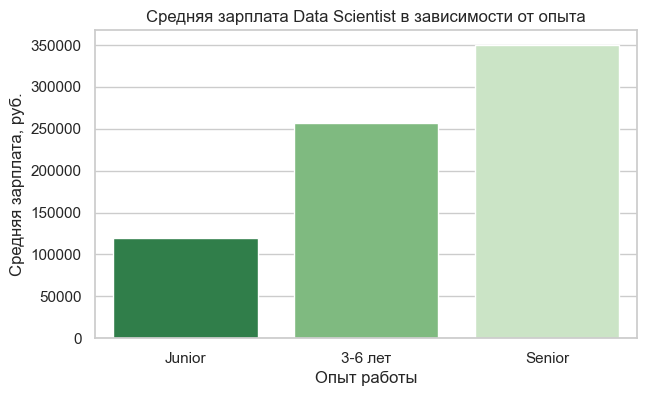

In [137]:
# дополнительная визуализция
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Настройки стиля
sns.set_theme(style="whitegrid")

# Вакансии по городам
plt.figure(figsize=(8, 5))
sns.barplot(x=list(cities.values()), y=list(cities.keys()), palette="Blues_r")
plt.xlabel("Количество вакансий")
plt.ylabel("Город")
plt.title("Распределение вакансий по городам")
plt.show()

# Популярность ключевых навыков
plt.figure(figsize=(6, 4))
sns.barplot(x=list(skills.keys()), y=list(skills.values()), palette="Oranges_r")
plt.xlabel("Навык")
plt.ylabel("Количество вакансий")
plt.title("Популярность навыков в DS-вакансиях")
plt.show()

# Средняя зарплата по опыту
plt.figure(figsize=(7, 4))
sns.barplot(x=list(experience_salary.keys()), y=list(experience_salary.values()), palette="Greens_r")
plt.xlabel("Опыт работы")
plt.ylabel("Средняя зарплата, руб.")
plt.title("Средняя зарплата Data Scientist в зависимости от опыта")
plt.show()

Направления для дальнейших исследований по рынку вакансий Data Science:

️1. Анализ зарплат

    1.1. Сравнение зарплат между городами
    В каких городах средняя зарплата DS выше? Разница зарплат в Москве, Санкт-Петербурге и других крупных городах.

    1.2. Связь между зарплатой и навыками
    Влияет ли наличие Python, SQL, ML в требованиях на размер зарплаты? Какие ключевые навыки чаще встречаются в высокооплачиваемых вакансиях?

    1.3. Разница в зарплатах по типу компаний
    Кто платит больше: стартапы или корпорации? Как отличаются зарплаты в IT-компаниях и компаниях из других отраслей?

2. Анализ требований к кандидатам

    2.1. Какие навыки чаще всего требуют? Построить рейтинг наиболее востребованных навыков в DS-вакансиях. Определить, какие навыки наиболее важны для Junior/Middle/Senior специалистов.
    
    2.2. Как изменяются требования к DS по уровням опыта? Какие навыки чаще указываются для Junior-DS по сравнению с Senior? Есть ли разница в требованиях между вакансиями в разных городах?

    2.3. Как часто работодатели требуют опыт работы? Как много вакансий готовы взять специалистов "без опыта"? Как часто встречаются стажировки для DS?

3. Географический анализ

    3.1. Где больше всего вакансий по DS? В каких регионах наблюдается наибольший спрос на Data Scientists? Есть ли перспективные регионы, где DS-специалистов мало, но спрос растёт?
    3.2. Связь количества вакансий с населением города? Как коррелирует количество вакансий с численностью населения? Достаточно ли вакансий для миллионников?
    3.3 Удалённая работа. Какой процент вакансий предлагают удалённую работу? В каких городах чаще встречаются офлайн-офисы?

4. Тренды и динамика рынка

    4.1. Как меняется спрос на DS-специалистов? Если есть данные за прошлые годы, можно изучить, растёт или падает количество вакансий. Какие навыки становятся более востребованными со временем?
    4.2. Влияние макроэкономических факторов. Как кризисы или новые технологии (например, развитие AI) влияют на спрос на DS? Какие отрасли наиболее активно нанимают DS сейчас?
    4.3. Связь между количеством вакансий и количеством резюме Есть ли "конкуренция" среди соискателей? В каких городах/отраслях больше кандидатов, чем вакансий?

Как это реализовать?
1. Построить графики (barplot, scatterplot, heatmap).
2. Использовать SQL-запросы для детального анализа данных.
3. Попробовать машинное обучение для предсказания зарплат по навыкам.

In [138]:
connection.close()